In [4]:
import osmnx as ox
import folium
from folium import GeoJson
import geopandas as gpd
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('D:/DIVERSA/FEMISNIST URBAN/Feminist_Urban_Design/datos_ccs.csv')
df.head(20)

,country,city,node_type,latitude,longitude
0,Argentina,Rosario,principal,-32.961405,-60.684841
1,Argentina,Rosario,secundaria,-32.959729,-60.687142
2,Argentina,Rosario,secundaria,-32.958462,-60.681169
3,Argentina,Rosario,secundaria,-32.960805,-60.681762
4,Argentina,Rosario,secundaria,-32.960559,-60.683139
5,Argentina,Rosario,secundaria,-32.959626,-60.681463
6,Argentina,Rosario,secundaria,-32.959381,-60.682840
7,Argentina,Rosario,secundaria,-32.959128,-60.684257
8,Argentina,Rosario,secundaria,-32.958882,-60.685546
9,Argentina,Rosario,secundaria,-32.958630,-60.686872


In [5]:

zoom_bounds = {
    "minx": -60.75,  
    "maxx": -60.65,
    "miny": -32.98,
    "maxy": -32.87,
}


rosario_graph = ox.graph_from_place("Rosario, Santa Fe, Argentina", network_type="all")


rosario_streets = ox.graph_to_gdfs(rosario_graph, nodes=False, edges=True)

fig, ax = plt.subplots(figsize=(15, 15))


rosario_streets.plot(ax=ax, linewidth=0.5, edgecolor="gray")


p_node = gdf[gdf['node_type'] == 'principal']
s_node = gdf[gdf['node_type'] == 'secundaria']

p_node.plot(ax=ax, color='red', markersize=10, label='Principal Node')
s_node.plot(ax=ax, color='blue', markersize=10, label='Secondary Node')


ax.set_xlim(zoom_bounds["minx"], zoom_bounds["maxx"])
ax.set_ylim(zoom_bounds["miny"], zoom_bounds["maxy"])


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nodes In Rosario, Santa Fe and Argentina')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


AttributeError: module 'matplotlib' has no attribute 'subplots'

c:\Users\Juan Vasconez\AppData\Local\Programs\Python\Python313\Lib\site-packages\osmnx\graph.py:392: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
C:\Users\Juan Vasconez\AppData\Local\Temp\ipykernel_25472\3745835182.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


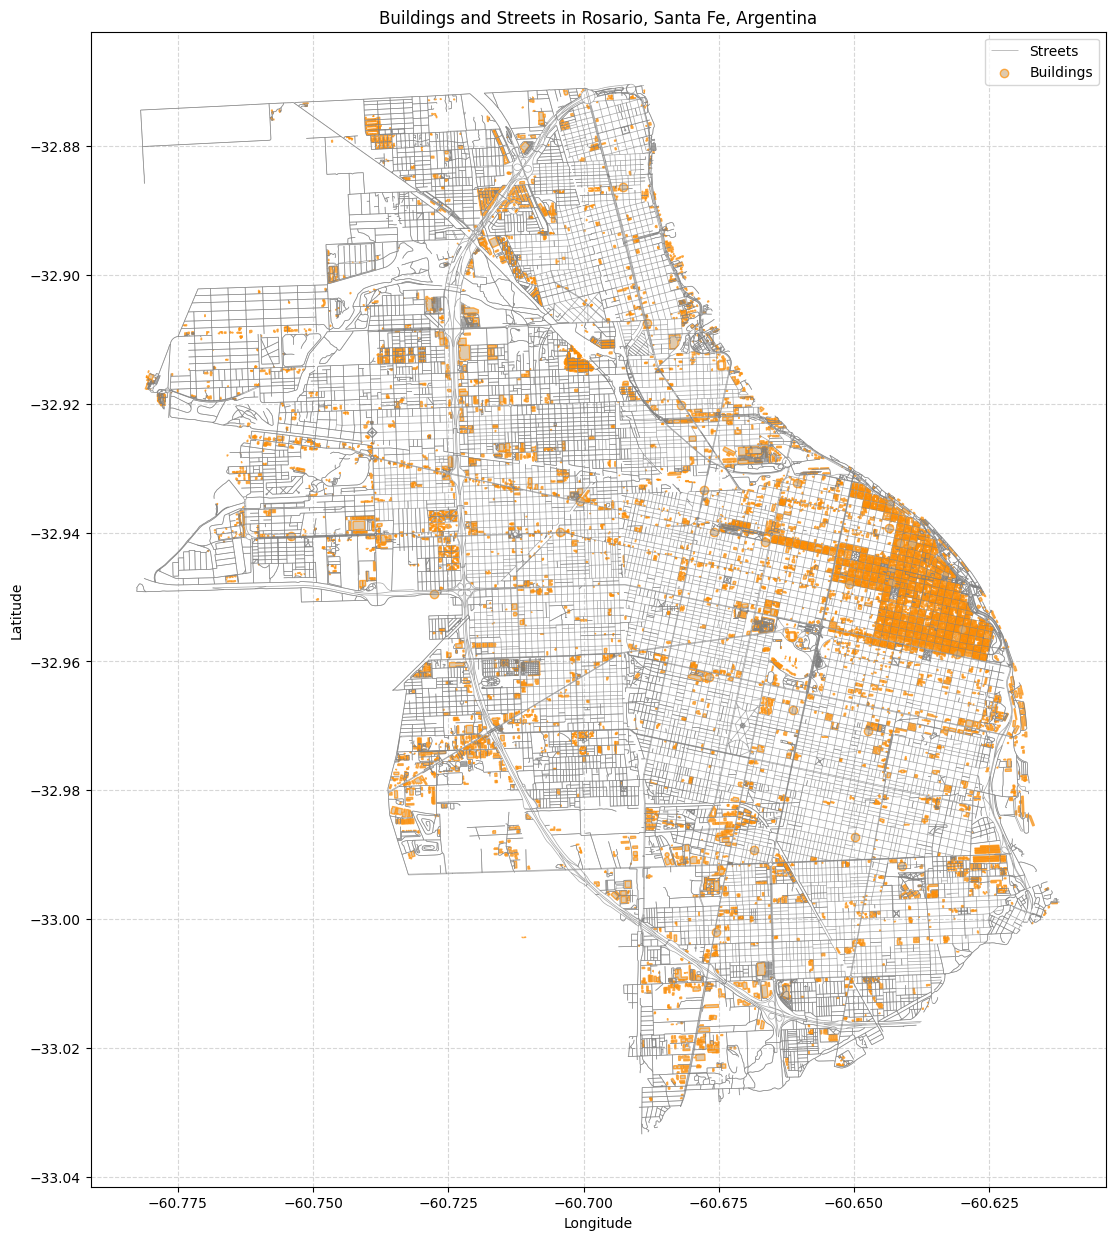

In [ ]:
place = "Rosario, Santa Fe, Argentina"
tags = {"building": True}


buildings_gdf = ox.features.features_from_place(place, tags)

rosario_graph = ox.graph_from_place(place, network_type="all")
rosario_streets = ox.graph_to_gdfs(rosario_graph, nodes=False, edges=True)


buildings_gdf = buildings_gdf.to_crs(rosario_streets.crs)


fig, ax = plt.subplots(figsize=(15, 15))


rosario_streets.plot(ax=ax, linewidth=0.5, edgecolor="gray", alpha=0.7, label="Streets")


buildings_gdf.plot(ax=ax, color="tan", alpha=0.7, edgecolor="darkorange", label="Buildings")


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Buildings and Streets in Rosario, Santa Fe, Argentina")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:

data = pd.read_csv('D:/DIVERSA/FEMISNIST URBAN/Feminist_Urban_Design/data_geo.csv')

filtered_data = data[['country', 'city', 'category', 'longitude', 'latitude', 'node_type']]

city_groups = filtered_data.groupby(['country', 'city'])

city_dataframes = {f"{country}_{city}": group for (country, city), group in city_groups}

example_city_name = "argentina_rosario"
if example_city_name in city_dataframes:
    rosario_df = city_dataframes[example_city_name]
    print(rosario_df.head())
else:
    print(f"No data available for city: {example_city_name}")

     country     city  category  longitude   latitude   node_type
0  argentina  rosario  autonomy -60.685128 -32.962587  secundaria
1  argentina  rosario  autonomy -60.688076 -32.963232  secundaria
2  argentina  rosario  autonomy -60.685288 -32.963752  secundaria
3  argentina  rosario  autonomy -60.684719 -32.961432  secundaria
4  argentina  rosario  autonomy -60.683746 -32.957543  secundaria


In [ ]:
place = "Rosario, Santa Fe, Argentina"


category_colors = {
    'safety': 'orange',
    'proximity': 'blue',
    'diversity': 'purple',
    'autonomy': 'green',
    'vitality': 'yellow',
    'representativity': 'pink'
}


rosario_df = city_dataframes['argentina_rosario']


rosario_df['category'] = rosario_df['category'].str.lower()
rosario_df['color'] = rosario_df['category'].map(category_colors)


unmapped_categories = rosario_df[rosario_df['color'].isna()]['category'].unique()
if len(unmapped_categories) > 0:
    print(f"Unmapped categories: {unmapped_categories}")
    rosario_df['color'] = rosario_df['color'].fillna('black') 


tags = {"building": True}  
buildings_gdf = ox.features.features_from_place(place, tags)

buildings_gdf = buildings_gdf[buildings_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
print(f"Filtered building geometries: {buildings_gdf.geometry.type.unique()}")

rosario_gdf = gpd.GeoDataFrame(
    rosario_df,
    geometry=gpd.points_from_xy(rosario_df['longitude'], rosario_df['latitude']),
    crs=buildings_gdf.crs
)


rosario_map = folium.Map(location=[-32.95, -60.65], zoom_start=13, tiles="cartodbpositron")


GeoJson(
    buildings_gdf,
    style_function=lambda x: {
        "fillColor": "tan",
        "color": "darkorange",
        "weight": 0.5,
        "fillOpacity": 0.5,
    },
    name="Buildings",
).add_to(rosario_map)


for _, row in rosario_gdf.iterrows():
    folium.CircleMarker(
        location=(row.geometry.y, row.geometry.x),
        radius=5,
        color=row['color'],  
        fill=True,
        fill_opacity=0.7,
        tooltip=f"Category: {row['category'].capitalize()}, Node: {row['node_type']}"
    ).add_to(rosario_map)


folium.LayerControl().add_to(rosario_map)


legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 250px; height: 200px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
    <b>&nbsp;Legend</b> <br>
    &nbsp;<i style="background:tan; width:10px; height:10px; display:inline-block;"></i>&nbsp;Buildings <br>
    &nbsp;<i style="background:orange; width:10px; height:10px; display:inline-block;"></i>&nbsp;Safety <br>
    &nbsp;<i style="background:blue; width:10px; height:10px; display:inline-block;"></i>&nbsp;Proximity <br>
    &nbsp;<i style="background:purple; width:10px; height:10px; display:inline-block;"></i>&nbsp;Diversity <br>
    &nbsp;<i style="background:green; width:10px; height:10px; display:inline-block;"></i>&nbsp;Autonomy <br>
    &nbsp;<i style="background:yellow; width:10px; height:10px; display:inline-block;"></i>&nbsp;Vitality <br>
    &nbsp;<i style="background:pink; width:10px; height:10px; display:inline-block;"></i>&nbsp;Representativity <br>
</div>
"""
rosario_map.get_root().html.add_child(folium.Element(legend_html))
rosario_map.save('rosario_map.html')
rosario_map

In [8]:
unique_cities = filtered_data['city'].unique()
print(unique_cities)

['rosario' 'jaragua_do_sul' 'piura' 'mandalay' 'bangkok' 'hanoi' 'quito'
 'medellin' 'cuenca']


In [ ]:
# Define category colors
category_colors = {
    'safety': 'orange',
    'proximity': 'blue',
    'diversity': 'purple',
    'autonomy': 'green',
    'vitality': 'yellow',
    'representativity': 'pink'
}

# Define the list of cities with their corresponding countries
city_country_mapping = {
    'rosario': 'Argentina',
    'jaragua_do_sul': 'Brazil',
    'piura': 'Peru',
    'mandalay': 'Myanmar',
    'bangkok': 'Thailand',
    'hanoi': 'Vietnam',
    'quito': 'Ecuador',
    'medellin': 'Colombia',
    'cuenca': 'Ecuador',
}

# Initialize a base map
global_map = folium.Map(location=[0.0, 0.0], zoom_start=2, tiles="cartodbpositron")

# Loop through all specified cities
for city_name, city_df in city_dataframes.items():
    # Only process cities in the target list
    if city_name not in city_country_mapping:
        print(f"Skipping city: {city_name}")
        continue

    country = city_country_mapping[city_name]
    print(f"Processing: {city_name}, {country}")
    
    # Normalize category names and assign colors
    city_df['category'] = city_df['category'].str.lower()
    city_df['color'] = city_df['category'].map(category_colors)
    city_df['color'] = city_df['color'].fillna('black')  # Assign black for unmapped categories

    # Create GeoDataFrame for points
    city_gdf = gpd.GeoDataFrame(
        city_df,
        geometry=gpd.points_from_xy(city_df['longitude'], city_df['latitude']),
        crs="EPSG:4326"  # WGS84 CRS
    )

    # Fetch building data for the city
    place = f"{city_name.capitalize()}, {country}"
    tags = {"building": True}
    try:
        buildings_gdf = ox.features.features_from_place(place, tags)
        buildings_gdf = buildings_gdf[buildings_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]  # Filter valid geometries
    except Exception as e:
        print(f"Error fetching building data for {place}: {e}")
        continue

    # Add buildings to the map
    GeoJson(
        buildings_gdf,
        style_function=lambda x: {
            "fillColor": "tan",
            "color": "darkorange",
            "weight": 0.5,
            "fillOpacity": 0.5,
        },
        name=f"Buildings in {city_name.capitalize()}",
    ).add_to(global_map)

    # Add points to the map
    for _, row in city_gdf.iterrows():
        folium.CircleMarker(
            location=(row.geometry.y, row.geometry.x),
            radius=5,
            color=row['color'],  # Use the assigned color
            fill=True,
            fill_opacity=0.7,
            tooltip=f"{city_name.capitalize()}: {row['category'].capitalize()} | Node: {row['node_type']}",
        ).add_to(global_map)

# Add a legend
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 300px; height: 230px;
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            padding: 10px;">
    <b>&nbsp;Legend</b> <br>
    &nbsp;<i style="background:tan; width:10px; height:10px; display:inline-block;"></i>&nbsp;Buildings <br>
    &nbsp;<i style="background:orange; width:10px; height:10px; display:inline-block;"></i>&nbsp;Safety <br>
    &nbsp;<i style="background:blue; width:10px; height:10px; display:inline-block;"></i>&nbsp;Proximity <br>
    &nbsp;<i style="background:purple; width:10px; height:10px; display:inline-block;"></i>&nbsp;Diversity <br>
    &nbsp;<i style="background:green; width:10px; height:10px; display:inline-block;"></i>&nbsp;Autonomy <br>
    &nbsp;<i style="background:yellow; width:10px; height:10px; display:inline-block;"></i>&nbsp;Vitality <br>
    &nbsp;<i style="background:pink; width:10px; height:10px; display:inline-block;"></i>&nbsp;Representativity <br>
</div>
"""
global_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
global_map.save('global_map.html')

print("Map has been saved as 'global_map.html'")
